In [1]:
! pip install open3d


ERROR: Could not find a version that satisfies the requirement open3d (from versions: none)
ERROR: No matching distribution found for open3d


In [1]:
# slicing
import open3d as o3d
import numpy as np
import os

# Load the mesh
obj_file_path = '/home/zohaib/pytorch3d-renderer/peel_3d_objects/pringles/pringles.obj'
obj_file_path = '/home/zohaib/pytorch3d-renderer/peel_3d_objects/Scan Models/Fanta Can/Scan 1.obj'
obj_file_path = '/home/zohaib/pytorch3d-renderer/peel_3d_objects/Scan Models/Pepsi Can/Pepsi can.obj'


mesh = o3d.io.read_triangle_mesh(obj_file_path, True)
mesh.compute_vertex_normals()

output_dir = "smooth_motion_images"
os.makedirs(output_dir, exist_ok=True)

# Parameters
num_images = 360  # Increase the number of images for smoother motion
angle_step_x = 360 / num_images  # Smaller step for rotation around x-axis
angle_step_y = 180 / num_images  # Smaller step for rotation around y-axis
angle_step_z = 360 / num_images  # Smaller step for rotation around z-axis

# Loop through each image
for i in range(num_images):
    # Generate smooth consecutive rotation angles for x, y, and z axes
    angles = np.array([i * angle_step_x, i * angle_step_y, i * angle_step_z])

    # Apply the rotation to the mesh
    mesh.rotate(mesh.get_rotation_matrix_from_xyz(np.radians(angles)))

    # Visualization
    vis = o3d.visualization.Visualizer()
    vis.create_window(visible=False)
    vis.add_geometry(mesh)
    vis.poll_events()
    vis.update_renderer()

    # Save the image
    
    image_path = os.path.join(output_dir, f"image_{i+1:03d}.png")
    vis.capture_screen_image(image_path, do_render=True)
    vis.destroy_window()

    print(f"{i+1}/{num_images} image saved...")

print(f"All {num_images} images saved in {output_dir}.")


Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
1/360 image saved...
2/360 image saved...
3/360 image saved...
4/360 image saved...
5/360 image saved...
6/360 image saved...
7/360 image saved...
8/360 image saved...


In [ ]:
import open3d as o3d
import numpy as np
import os

def manual_adjustment(mesh):
    # Visualization for manual orientation adjustment
    vis = o3d.visualization.Visualizer()
    vis.create_window()
    vis.add_geometry(mesh)
    # Display instructions
    print("Adjust the orientation of the mesh manually using the Open3D viewer.")
    print("Press 'Q' to quit the viewer when you're done.")
    # Run the visualization
    vis.run()
    vis.destroy_window()

def adjust_to_upright(mesh):
    # Example transformation to adjust the mesh to an upright position
    # You need to determine the appropriate rotation angles for your mesh
    # Here we assume you need to rotate around the x-axis and z-axis
    # This is an example; you might need different angles based on your mesh

    # Rotate around x-axis
    angle_x = np.radians(-90)  # Example: -90 degrees
    rotation_matrix_x = mesh.get_rotation_matrix_from_xyz([angle_x, 0, 0])
    mesh.rotate(rotation_matrix_x)

    # Rotate around z-axis (if needed)
    angle_z = np.radians(0)  # Example: 0 degrees (no rotation)
    rotation_matrix_z = mesh.get_rotation_matrix_from_xyz([0, 0, angle_z])
    mesh.rotate(rotation_matrix_z)

    # Check if additional adjustments are needed
    return mesh

# Load the mesh
obj_file_path = '/home/zohaib/pytorch3d-renderer/peel_3d_objects/Scan Models/Pepsi Can/Pepsi can.obj'
mesh = o3d.io.read_triangle_mesh(obj_file_path, True)
mesh.compute_vertex_normals()

# Perform manual orientation adjustment
manual_adjustment(mesh)

# Adjust the mesh to an upright position
mesh = adjust_to_upright(mesh)

# Prepare output directory
output_dir = "smooth_motion_images"
os.makedirs(output_dir, exist_ok=True)

# Parameters
num_images = 360
angle_step = 360 / num_images

# Create a visualizer for capturing images
vis = o3d.visualization.Visualizer()
vis.create_window(visible=False)
vis.add_geometry(mesh)

# Loop through each image
for i in range(num_images):
    # Apply rotation to the mesh based on its current orientation
    angle = i * angle_step
    rotation_matrix = mesh.get_rotation_matrix_from_xyz(np.radians([0, angle, 0]))  # Rotate around y-axis
    mesh.rotate(rotation_matrix)
    
    # Update and save the image
    vis.update_geometry(mesh)
    vis.poll_events()
    vis.update_renderer()
    image_path = os.path.join(output_dir, f"image{i+1:03d}.png")
    vis.capture_screen_image(image_path)
    print(f"{i+1}/{num_images} image saved...")

# Clean up
vis.destroy_window()
print(f"All {num_images} images saved in {output_dir}.")



In [ ]:
# slicing
import open3d as o3d
import numpy as np
import os

# Load the mesh
obj_file_path = '/home/zohaib/pytorch3d-renderer/peel_3d_objects/pringles/pringles.obj'
obj_file_path = '/home/zohaib/pytorch3d-renderer/peel_3d_objects/Scan Models/Fanta Can/Scan 1.obj'
obj_file_path = '/home/zohaib/pytorch3d-renderer/peel_3d_objects/Scan Models/Pepsi Can/Pepsi can.obj'


mesh = o3d.io.read_triangle_mesh(obj_file_path, True)
mesh.compute_vertex_normals()

output_dir = "is_orientaion_corrrctsmooth_motion_images"
os.makedirs(output_dir, exist_ok=True)

# Parameters
num_images = 360  # Increase the number of images for smoother motion
angle_step_x = 360 / num_images  # Smaller step for rotation around x-axis
angle_step_y = 360 / num_images  # Smaller step for rotation around y-axis
angle_step_z = 180 / num_images  # Smaller step for rotation around z-axis

# Loop through each image
for i in range(num_images):
    # Generate smooth consecutive rotation angles for x, y, and z axes
    angles = np.array([i * angle_step_x, i * angle_step_y, i * angle_step_z])

    # Apply the rotation to the mesh
    mesh.rotate(mesh.get_rotation_matrix_from_xyz(np.radians(angles)))

    # Visualization
    vis = o3d.visualization.Visualizer()
    vis.create_window(visible=False)
    vis.add_geometry(mesh)
    vis.poll_events()
    vis.update_renderer()

    # Save the image
    
    image_path = os.path.join(output_dir, f"image_{i+1:03d}.png")
    vis.capture_screen_image(image_path, do_render=True)
    vis.destroy_window()

    print(f"{i+1}/{num_images} image saved...")

print(f"All {num_images} images saved in {output_dir}.")

In [ ]:
import cv2
import numpy as np
import os
import glob

# Parameters
image_width = 1920
image_height = 1080
output_annotation_dir = "yolo_annotations"
output_visualization_dir = "annotated_images"
os.makedirs(output_annotation_dir, exist_ok=True)
os.makedirs(output_visualization_dir, exist_ok=True)

# Load all images
image_files = glob.glob("smooth_motion_images/*.png")

for image_file in image_files:
    print(image_file)
    # Read image
    image = cv2.imread(image_file)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Edge detection
    edges = cv2.Canny(gray, 50, 150)
    
    # Find contours
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Prepare annotation file
    annotation_file = os.path.join(output_annotation_dir, os.path.basename(image_file).replace('.png', '.txt'))

    # Initialize variables to track the maximum bounding box
    max_area = 0
    max_bbox = None
    
    # Find the bounding box with the largest area
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        area = w * h
        if area > max_area:
            max_area = area
            max_bbox = (x, y, w, h)

    # Write the maximum bounding box to YOLO annotation file
    if max_bbox is not None:
        with open(annotation_file, 'w') as f:
            x, y, w, h = max_bbox
            center_x = (x + w / 2) / image_width
            center_y = (y + h / 2) / image_height
            width = w / image_width
            height = h / image_height
            # Write the max bounding box in YOLO format
            f.write(f"0 {center_x} {center_y} {width} {height}\n")

    # Visualize the max bounding box with a green rectangle
    annotated_image = image.copy()
    if max_bbox is not None:
        x, y, w, h = max_bbox
        cv2.rectangle(annotated_image, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Save visualization image
    vis_image_file = os.path.join(output_visualization_dir, os.path.basename(image_file))
    cv2.imwrite(vis_image_file, annotated_image)

    print(f"Max bounding box annotations and visualization saved for {os.path.basename(image_file)}")

print(f"All images annotated and saved in {output_annotation_dir} and {output_visualization_dir}.")


# extras

In [ ]:
# annotation

import cv2
import numpy as np
import os
import glob

# Parameters
image_width = 1920
image_height = 1080
output_annotation_dir = "yolo_annotations"
output_visualization_dir = "annotated_images"
os.makedirs(output_annotation_dir, exist_ok=True)
os.makedirs(output_visualization_dir, exist_ok=True)

# Load all images
image_files = glob.glob("smooth_motion_images/*.png")

for image_file in image_files:
    # Read image
    image = cv2.imread(image_file)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Edge detection
    edges = cv2.Canny(gray, 50, 150)
    
    # Find contours
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Prepare annotation file
    annotation_file = os.path.join(output_annotation_dir, os.path.basename(image_file).replace('.png', '.txt'))
    with open(annotation_file, 'w') as f:
        for contour in contours:
            # Get bounding box from contour
            x, y, w, h = cv2.boundingRect(contour)
            # Calculate YOLO format bounding box (center_x, center_y, width, height) normalized
            center_x = (x + w / 2) / image_width
            center_y = (y + h / 2) / image_height
            width = w / image_width
            height = h / image_height
            # Write to YOLO annotation file
            f.write(f"0 {center_x} {center_y} {width} {height}\n")
    
    # Visualize annotations with green bounding boxes
    annotated_image = image.copy()
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        cv2.rectangle(annotated_image, (x, y), (x+w, y+h), (0, 255, 0), 2)

    # Save visualization image
    vis_image_file = os.path.join(output_visualization_dir, os.path.basename(image_file))
    cv2.imwrite(vis_image_file, annotated_image)
    
    # Display the annotated image
#    cv2.imshow('Annotated Image', annotated_image)
#    cv2.waitKey(0)  # Wait until a key is pressed
#    cv2.destroyAllWindows()

    print(f"Annotations and visualization saved for {os.path.basename(image_file)}")

print(f"All images annotated and saved in {output_annotation_dir} and {output_visualization_dir}.")


In [1]:
# orientation improved
import open3d as o3d
import numpy as np
import os

def adjust_to_upright(mesh):
    # Rotate around x-axis by -90 degrees to align Z-up (Peel3D) to Y-up (Open3D)
    angle_x = np.radians(90)  # -90 degrees rotation
    # rotation_matrix_x = mesh.get_rotation_matrix_from_xyz([180, 0, angle_x])
    rotation_matrix_x = mesh.get_rotation_matrix_from_xyz(np.radians([-20, 2*90,90]))
    # rotation_matrix_x = mesh.get_rotation_matrix_from_xyz(np.radians([-10, 2*90,0]))
    mesh.rotate(rotation_matrix_x)

    return mesh

def manual_adjustment(mesh):
    # Visualization for manual orientation adjustment
    vis = o3d.visualization.Visualizer()
    vis.create_window()
    vis.add_geometry(mesh)
    # Display instructions
    print("Adjust the orientation of the mesh manually using the Open3D viewer.")
    print("Press 'Q' to quit the viewer when you're done.")
    # Run the visualization
    vis.run()
    vis.destroy_window()

# Load the mesh
obj_file_path = '/home/zohaib/pytorch3d-renderer/peel_3d_objects/Scan Models/Pepsi Can/Pepsi can.obj'
# obj_file_path = '/home/zohaib/pytorch3d-renderer/peel_3d_objects/Scan Models/Fanta Can/Scan 1.obj'
# obj_file_path = '/home/zohaib/pytorch3d-renderer/peel_3d_objects/Scan Models/Wavy Lays/Scan 1.obj'

mesh = o3d.io.read_triangle_mesh(obj_file_path, True)
mesh.compute_vertex_normals()

# Adjust the mesh to an upright position
mesh = adjust_to_upright(mesh)

# Perform manual orientation adjustment
manual_adjustment(mesh)

# Prepare output directory
output_dir = "smooth_motion_images"
output_dir = "is_orientaion_corrrctsmooth_motion_images"
os.makedirs(output_dir, exist_ok=True)

# Parameters
num_images = 100
angle_step = 360 / num_images

# Create a visualizer for capturing images
vis = o3d.visualization.Visualizer()
vis.create_window(visible=False)
vis.add_geometry(mesh)
import random
# Loop through each image
for i in range(num_images):
    # Apply rotation to the mesh based on its current orientation
    angle = i * angle_step
    rotation_matrix = mesh.get_rotation_matrix_from_xyz(np.radians([ random.randint(-20, 20), angle, 0]))  # Rotate around y-axis
    mesh.rotate(rotation_matrix)
    
    # Update and save the image
    vis.update_geometry(mesh)
    vis.poll_events()
    vis.update_renderer()
    image_path = os.path.join(output_dir, f"image{i+1:03d}.png")
    vis.capture_screen_image(image_path)
    print(f"{i+1}/{num_images} image saved...")

# Clean up
vis.destroy_window()
print(f"All {num_images} images saved in {output_dir}.")


Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
Adjust the orientation of the mesh manually using the Open3D viewer.
Press 'Q' to quit the viewer when you're done.
1/100 image saved...
2/100 image saved...
3/100 image saved...
4/100 image saved...
5/100 image saved...
6/100 image saved...
7/100 image saved...
8/100 image saved...
9/100 image saved...
10/100 image saved...
11/100 image saved...
12/100 image saved...
13/100 image saved...
14/100 image saved...


In [ ]:
np.linspace(1,5,5)

In [ ]:
np.linspace(0, 360, num_images).shape

In [1]:
# orientation improved
import open3d as o3d
import numpy as np
import os

def adjust_to_upright(mesh):
    # Rotate around x-axis by -90 degrees to align Z-up (Peel3D) to Y-up (Open3D)
    angle_x = np.radians(90)  # -90 degrees rotation
    # rotation_matrix_x = mesh.get_rotation_matrix_from_xyz([180, 0, angle_x])
    rotation_matrix_x = mesh.get_rotation_matrix_from_xyz(np.radians([-20, 2*90,90]))
    # rotation_matrix_x = mesh.get_rotation_matrix_from_xyz(np.radians([-10, 2*90,0]))
    mesh.rotate(rotation_matrix_x)

    return mesh

def manual_adjustment(mesh):
    # Visualization for manual orientation adjustment
    vis = o3d.visualization.Visualizer()
    vis.create_window()
    vis.add_geometry(mesh)
    # Display instructions
    print("Adjust the orientation of the mesh manually using the Open3D viewer.")
    print("Press 'Q' to quit the viewer when you're done.")
    # Run the visualization
    vis.run()
    vis.destroy_window()

# Load the mesh
obj_file_path = '/home/zohaib/pytorch3d-renderer/peel_3d_objects/Scan Models/Pepsi Can/Pepsi can.obj'
# obj_file_path = '/home/zohaib/pytorch3d-renderer/peel_3d_objects/Scan Models/Fanta Can/Scan 1.obj'
# obj_file_path = '/home/zohaib/pytorch3d-renderer/peel_3d_objects/Scan Models/Wavy Lays/Scan 1.obj'

mesh = o3d.io.read_triangle_mesh(obj_file_path, True)
mesh.compute_vertex_normals()

# Adjust the mesh to an upright position
mesh = adjust_to_upright(mesh)

# Perform manual orientation adjustment
manual_adjustment(mesh)

# Prepare output directory
output_dir = "smooth_motion_images"
output_dir = "is_orientaion_corrrctsmooth_motion_images"
os.makedirs(output_dir, exist_ok=True)

# Parameters
num_images = 100
angle_step = 360 / num_images

# Create a visualizer for capturing images
vis = o3d.visualization.Visualizer()
vis.create_window(visible=False)
vis.add_geometry(mesh)
import random
# Loop through each image
for i in range(num_images):
    # Apply rotation to the mesh based on its current orientation
    angle = i * angle_step
    rotation_matrix = mesh.get_rotation_matrix_from_xyz(np.radians([ random.randint(-20, 20), angle, 0]))  # Rotate around y-axis
    mesh.rotate(rotation_matrix)
    
    # Update and save the image
    vis.update_geometry(mesh)
    vis.poll_events()
    vis.update_renderer()
    image_path = os.path.join(output_dir, f"image{i+1:03d}.png")
    vis.capture_screen_image(image_path)
    print(f"{i+1}/{num_images} image saved...")

# Clean up
vis.destroy_window()
print(f"All {num_images} images saved in {output_dir}.")

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
Adjust the orientation of the mesh manually using the Open3D viewer.
Press 'Q' to quit the viewer when you're done.
1/100 image saved...
2/100 image saved...
3/100 image saved...
4/100 image saved...
5/100 image saved...
6/100 image saved...
7/100 image saved...


In [1]:
import open3d as o3d
import numpy as np
import os
import random

def adjust_to_upright(mesh):
    # Rotate around x-axis by -90 degrees to align Z-up (Peel3D) to Y-up (Open3D)
    rotation_matrix_x = mesh.get_rotation_matrix_from_xyz(np.radians([-20, 2 * 90, 90]))
    mesh.rotate(rotation_matrix_x)
    return mesh

def manual_adjustment(mesh):
    # Visualization for manual orientation adjustment
    vis = o3d.visualization.Visualizer()
    vis.create_window()
    vis.add_geometry(mesh)
    print("Adjust the orientation of the mesh manually using the Open3D viewer.")
    print("Press 'Q' to quit the viewer when you're done.")
    vis.run()
    vis.destroy_window()
    return mesh  # Return the manually adjusted mesh

# Load the mesh
obj_file_path = '/home/zohaib/pytorch3d-renderer/peel_3d_objects/Scan Models/Pepsi Can/Pepsi can.obj'
mesh = o3d.io.read_triangle_mesh(obj_file_path, True)
mesh.compute_vertex_normals()

# Adjust the mesh to an upright position
mesh = adjust_to_upright(mesh)

# Perform manual orientation adjustment
mesh = manual_adjustment(mesh)

# Prepare output directory
output_dir = "is_orientation_correct_smooth_motion_images"
os.makedirs(output_dir, exist_ok=True)

# Parameters
num_images = 100
angle_step = 360 / num_images

# Create a new visualizer for capturing images after adjustment
vis = o3d.visualization.Visualizer()
vis.create_window(visible=False)
vis.add_geometry(mesh)  # Re-add the adjusted mesh

# Loop through each image
for i in range(num_images):
    # Apply rotation to the adjusted mesh
    angle = i * angle_step
    rotation_matrix = mesh.get_rotation_matrix_from_xyz(np.radians([random.randint(-20, 20), angle, 0]))
    mesh.rotate(rotation_matrix)
    
    # Update and save the image
    vis.update_geometry(mesh)
    vis.poll_events()
    vis.update_renderer()
    image_path = os.path.join(output_dir, f"image{i+1:03d}.png")
    vis.capture_screen_image(image_path)
    print(f"{i+1}/{num_images} image saved...")

# Clean up
vis.destroy_window()
print(f"All {num_images} images saved in {output_dir}.")


Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
Adjust the orientation of the mesh manually using the Open3D viewer.
Press 'Q' to quit the viewer when you're done.
1/100 image saved...
2/100 image saved...
3/100 image saved...
4/100 image saved...
5/100 image saved...
6/100 image saved...
7/100 image saved...
8/100 image saved...
9/100 image saved...
10/100 image saved...
11/100 image saved...
12/100 image saved...
13/100 image saved...
14/100 image saved...
15/100 image saved...
16/100 image saved...
17/100 image saved...
18/100 image saved...
19/100 image saved...
20/100 image saved...
21/100 image saved...
22/100 image saved...


In [1]:
import open3d as o3d
import numpy as np
import os
import random

def adjust_to_upright(mesh):
    # Rotate around x-axis by -90 degrees to align Z-up (Peel3D) to Y-up (Open3D)
    angle_x = np.radians(90)  # -90 degrees rotation
    rotation_matrix_x = mesh.get_rotation_matrix_from_xyz(np.radians([-20, 2*90,90]))
    mesh.rotate(rotation_matrix_x)
    return mesh

def manual_adjustment(mesh):
    # Visualization for manual orientation adjustment
    vis = o3d.visualization.Visualizer()
    vis.create_window()
    vis.add_geometry(mesh)
    
    print("Adjust the orientation of the mesh manually using the Open3D viewer.")
    print("Press 'Q' to quit the viewer when you're done.")
    
    # Run the visualization
    vis.run()
    updated_mesh = vis.get_geometry()
    vis.destroy_window()
    
    return updated_mesh

# Load the mesh
obj_file_path = '/home/zohaib/pytorch3d-renderer/peel_3d_objects/Scan Models/Pepsi Can/Pepsi can.obj'
mesh = o3d.io.read_triangle_mesh(obj_file_path, True)
mesh.compute_vertex_normals()

# Adjust the mesh to an upright position
mesh = adjust_to_upright(mesh)

# Perform manual orientation adjustment
mesh = manual_adjustment(mesh)  # Update mesh with the adjusted version

# Prepare output directory
output_dir = "smooth_motion_images"
os.makedirs(output_dir, exist_ok=True)

# Parameters
num_images = 100
angle_step = 360 / num_images

# Create a visualizer for capturing images
vis = o3d.visualization.Visualizer()
vis.create_window(visible=False)
vis.add_geometry(mesh)

# Loop through each image
for i in range(num_images):
    # Apply rotation to the mesh based on its current orientation
    angle = i * angle_step
    rotation_matrix = mesh.get_rotation_matrix_from_xyz(np.radians([random.randint(-20, 20), angle, 0]))  # Rotate around y-axis
    mesh.rotate(rotation_matrix)
    
    # Update and save the image
    vis.update_geometry(mesh)
    vis.poll_events()
    vis.update_renderer()
    image_path = os.path.join(output_dir, f"image{i+1:03d}.png")
    vis.capture_screen_image(image_path)
    print(f"{i+1}/{num_images} image saved...")

# Clean up
vis.destroy_window()
print(f"All {num_images} images saved in {output_dir}.")

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
Adjust the orientation of the mesh manually using the Open3D viewer.
Press 'Q' to quit the viewer when you're done.


AttributeError: 'open3d.cuda.pybind.visualization.Visualizer' object has no attribute 'get_geometry'

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1..254].


np.mean(i)=238.64724971064814, i[0][0]=array([255, 255, 255], dtype=uint8)
<class 'numpy.ndarray'> (1080, 1920, 3)


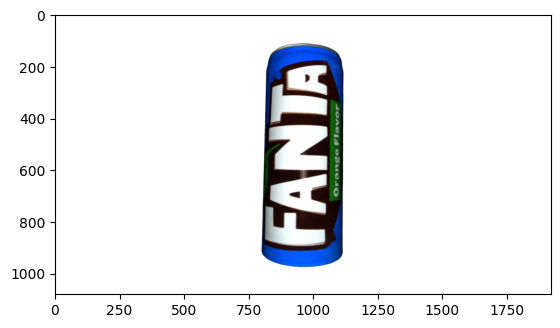

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-254..1].


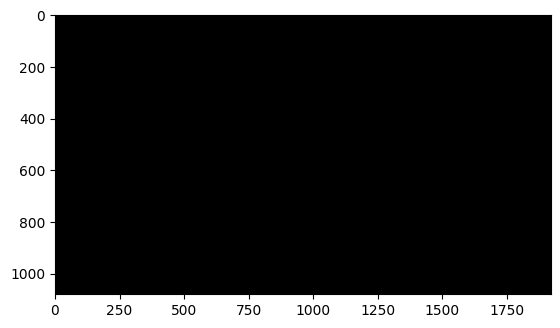

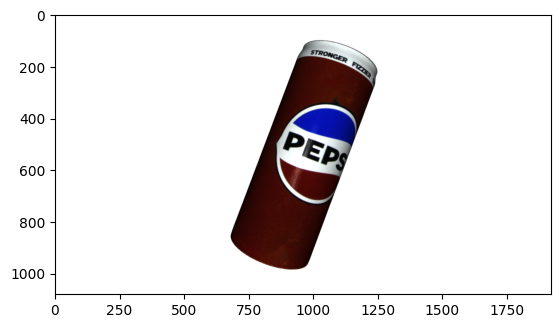

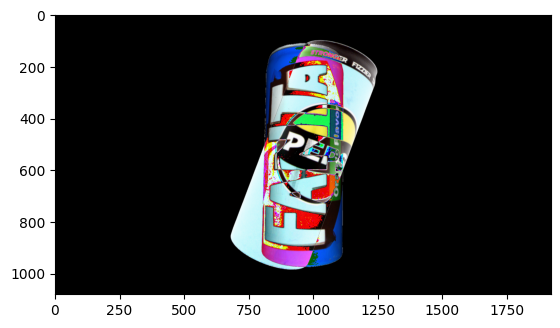

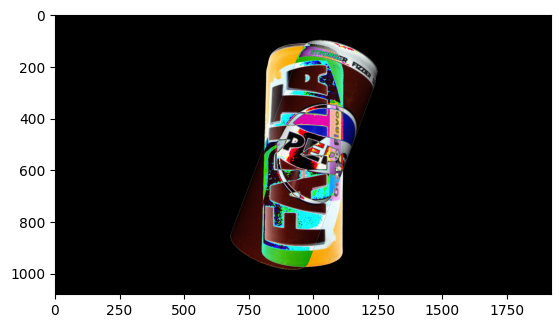

In [50]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
i = cv2.imread("/home/zohaib/pytorch3d-renderer/open3d/train/images/fanta_01.png")
j = cv2.imread("/home/zohaib/pytorch3d-renderer/open3d/train/images/pepsi_31.png")
print(f"{np.mean(i)=}, {i[0][0]=}")
# j = cv2.imread("/home/zohaib/Pictures/0.png")
b = np.ones((i.shape), dtype=np.int8)
# i= i.reshape((2160,3840,3))
# j= j.reshape((1080,1920,3))
print(type(i), b.shape)

plt.imshow(i-b)
plt.show()
plt.imshow(b-i)
plt.show()
plt.imshow(j)
plt.show()
plt.imshow(i-j)
plt.show()
plt.imshow(j-i)
plt.show()

In [6]:
import cv2
import numpy as np

def apply_random_background(object_image, background_image):
    # Convert the object image to grayscale and create a mask
    gray = cv2.cvtColor(object_image, cv2.COLOR_BGR2GRAY)
    _, mask = cv2.threshold(gray, 240, 255, cv2.THRESH_BINARY_INV)  # Mask for the object (assuming white background)
    
    # Invert the mask to create an object-only mask
    object_only = cv2.bitwise_and(object_image, object_image, mask=mask)

    # Resize the background to match the object image
    background_image = cv2.resize(background_image, (object_image.shape[1], object_image.shape[0]))

    # Remove the object from the background using the inverse mask
    inv_mask = cv2.bitwise_not(mask)
    background_only = cv2.bitwise_and(background_image, background_image, mask=inv_mask)

    # Add the object on top of the new background
    final_image = cv2.add(background_only, object_only)

    return final_image

# Load your object image (with a white background) and a random background image
object_image = cv2.imread('path_to_object_image.png')
background_image = cv2.imread('path_to_background_image.png')

object_image = cv2.imread("/home/zohaib/pytorch3d-renderer/open3d/train/images/fanta_01.png")
object_image = cv2.imread("/home/zohaib/pytorch3d-renderer/open3d/train/images/pepsi_31.png")
background_image = cv2.imread("/home/zohaib/Pictures/0.png")

# Apply the random background
result_image = apply_random_background(object_image, background_image)

# Save or display the result
cv2.imshow('Result', result_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


[ WARN:0@130.182] global loadsave.cpp:241 findDecoder imread_('path_to_object_image.png'): can't open/read file: check file path/integrity
[ WARN:0@130.182] global loadsave.cpp:241 findDecoder imread_('path_to_background_image.png'): can't open/read file: check file path/integrity


In [7]:
import cv2
import numpy as np

def create_hole_and_paste_object(object_image, background_image):
    # Convert the object image to grayscale and create a binary mask for the object
    gray = cv2.cvtColor(object_image, cv2.COLOR_BGR2GRAY)
    _, mask = cv2.threshold(gray, 240, 255, cv2.THRESH_BINARY_INV)  # Mask for the object (assuming white background)

    # Create an inverse mask for placing the object (invert the mask to get the background part)
    inv_mask = cv2.bitwise_not(mask)

    # Resize the background to match the object image
    background_image = cv2.resize(background_image, (object_image.shape[1], object_image.shape[0]))

    # Remove the area of the object from the background by using the mask
    background_with_hole = cv2.bitwise_and(background_image, background_image, mask=inv_mask)
    cv2.imshow("with hole", background_with_hole)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    # Extract the object itself by applying the mask to the object image
    object_only = cv2.bitwise_and(object_image, object_image, mask=mask)

    # Combine the object with the background (paste the object into the hole)
    final_image = cv2.add(background_with_hole, object_only)

    return final_image

# Load the object image (with white background) and a random background image
# object_image = cv2.imread('path_to_object_image.png')  # Your 2D object image
# background_image = cv2.imread('path_to_background_image.png')  # Random background (e.g., jungle scenery)

object_image = cv2.imread('path_to_object_image.png')
background_image = cv2.imread('path_to_background_image.png')

object_image = cv2.imread("/home/zohaib/pytorch3d-renderer/open3d/train/images/fanta_01.png")
object_image = cv2.imread("/home/zohaib/pytorch3d-renderer/open3d/train/images/pepsi_31.png")
background_image = cv2.imread("/home/zohaib/Pictures/0.png")


# Apply the background hole creation and object pasting
result_image = create_hole_and_paste_object(object_image, background_image)


# Save or display the result
cv2.imshow('Result', result_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [14]:
import cv2
import numpy as np

def create_hole_and_paste_object(object_image, background_image):
    # Convert the object image to grayscale
    gray = cv2.cvtColor(object_image, cv2.COLOR_BGR2GRAY)
    
    # Apply GaussianBlur to smooth the image and reduce noise
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    
    # Perform edge detection using Canny to find the object boundary
    edges = cv2.Canny(blurred, 50, 150)

    # Find contours based on the edges detected
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Create a mask of the object based on the contours
    mask = np.zeros_like(gray)
    cv2.drawContours(mask, contours, -1, (255), thickness=cv2.FILLED)
    
    # Invert the mask for the background
    inv_mask = cv2.bitwise_not(mask)

    # Resize the background to match the object image
    background_image = cv2.resize(background_image, (object_image.shape[1], object_image.shape[0]))

    # Remove the area of the object from the background using the inverted mask
    background_with_hole = cv2.bitwise_and(background_image, background_image, mask=inv_mask)
    cv2.imshow("Background with Hole", background_with_hole)
    cv2.waitKey(0)

    # Extract the object itself by applying the original mask to the object image
    object_only = cv2.bitwise_and(object_image, object_image, mask=mask)

    # Combine the object with the background (paste the object into the hole)
    final_image = cv2.add(background_with_hole, object_only)

    return final_image

# Load the object image (with white background) and a random background image
object_image = cv2.imread("/home/zohaib/pytorch3d-renderer/open3d/train/images/fanta_01.png")
object_image = cv2.imread("/home/zohaib/pytorch3d-renderer/open3d/train/images/pepsi_31.png")
# object_image = cv2.imread("/home/zohaib/pytorch3d-renderer/open3d/train/images/wavy_150.png")

background_image = cv2.imread("/home/zohaib/Pictures/0.png")

# Apply the background hole creation and object pasting
result_image = create_hole_and_paste_object(object_image, background_image)

# Save or display the result
cv2.imshow('Result', result_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [1]:
# working but multiple rounds: DONE

import open3d as o3d
import numpy as np
import os

def adjust_to_upright(mesh):
    # Rotate the mesh to align Z-up (Peel3D) to Y-up (Open3D)
    rotation_matrix_x = mesh.get_rotation_matrix_from_xyz(np.radians([-90, 0, 0]))
    rotation_matrix_x = mesh.get_rotation_matrix_from_xyz(np.radians([-20, 2*90,90]))

    mesh.rotate(rotation_matrix_x)
    return mesh

def manual_adjustment(mesh):
    # Visualization for manual orientation adjustment
    vis = o3d.visualization.Visualizer()
    vis.create_window()
    vis.add_geometry(mesh)
    # Display instructions
    print("Adjust the orientation of the mesh manually using the Open3D viewer.")
    print("Press 'Q' to quit the viewer when you're done.")
    # Run the visualization
    vis.run()
    vis.destroy_window()

# Load the mesh
obj_file_path = '/home/zohaib/pytorch3d-renderer/peel_3d_objects/Scan Models/Pepsi Can/Pepsi can.obj'
obj_file_path = '/home/zohaib/pytorch3d-renderer/peel_3d_objects/Scan Models/Wavy Lays/Scan 1.obj'
# obj_file_path = '/home/zohaib/pytorch3d-renderer/peel_3d_objects/Scan Models/Pringles model/Scan 1.obj'
obj_file_path = '/home/zohaib/pytorch3d-renderer/peel_3d_objects/Scan Models/Sprite Can/Sprite can.obj'

mesh = o3d.io.read_triangle_mesh(obj_file_path, True)
mesh.compute_vertex_normals()

# Adjust the mesh to an upright position
mesh = adjust_to_upright(mesh)

# Perform manual orientation adjustment
manual_adjustment(mesh)

# Prepare output directory
output_dir = "smooth_motion_images"
output_dir = "is_orientaion_corrrctsmooth_motion_images"
os.makedirs(output_dir, exist_ok=True)

# Parameters
num_images = 150  # Number of images to capture
angle_step = 360 / 3600  # Step size for rotation in degrees
print(angle_step)
import random
# Create a visualizer for capturing images
vis = o3d.visualization.Visualizer()
vis.create_window(visible=False)
vis.add_geometry(mesh)

# Loop through each image
for i in range(num_images):
    # Apply the rotation incrementally for smooth continuous rotation
    current_angle = i * angle_step
    rotation_matrix = mesh.get_rotation_matrix_from_xyz(np.radians([np.random.uniform(-6,6), current_angle, 0]))  # Rotate around y-axis
    mesh.rotate(rotation_matrix)
    
    # Update the visualization and save the image
    vis.update_geometry(mesh)
    vis.poll_events()
    vis.update_renderer()
    image_path = os.path.join(output_dir, f"image{i+1:03d}.png")
    vis.capture_screen_image(image_path)
    print(f"{i+1}/{num_images} image saved...")

# Clean up
vis.destroy_window()
print(f"All {num_images} images saved in {output_dir}.")


Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
Adjust the orientation of the mesh manually using the Open3D viewer.
Press 'Q' to quit the viewer when you're done.
0.1
1/150 image saved...
2/150 image saved...
3/150 image saved...
4/150 image saved...
5/150 image saved...
6/150 image saved...
7/150 image saved...
8/150 image saved...
9/150 image saved...
10/150 image saved...
11/150 image saved...


In [ ]:
360/0.1

In [ ]:
import numpy as np

# Generate a random float between -10 and 10
random_float = np.random.normal(-10, 10)
print(random_float)

In [ ]:
# obj_file_path = '/home/zohaib/pytorch3d-renderer/peel_3d_objects/Scan Models/Wavy Lays/Scan 1.obj'


# EXtra

In [ ]:

import open3d as o3d
import numpy as np
import os
import matplotlib.pyplot as plt


In [1]:
import open3d as o3d

# Load the OBJ file
# mesh = o3d.io.read_triangle_mesh("/home/zohaib/pytorch3d-renderer/peel_3d_objects/pringles/pringles.obj", True)
# mesh = o3d.io.read_triangle_mesh("/home/zohaib/pytorch3d-renderer/peel_3d_objects/scanned_models/fanta_can/fanta.obj")
# mesh = o3d.io.read_triangle_mesh("/home/zohaib/pytorch3d-renderer/peel_3d_objects/scanned_models/pepsi_can/pepsi.obj")
mesh = o3d.io.read_triangle_mesh("/home/zohaib/pytorch3d-renderer/peel_3d_objects/Scan Models/Pepsi Can/Pepsi can.obj", True)
# mesh = o3d.io.read_triangle_mesh("/home/zohaib/pytorch3d-renderer/peel_3d_objects/scanned_models/sprite_can/sprite.obj")
mesh.compute_vertex_normals()

o3d.visualization.draw_geometries([mesh])


Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [ ]:
from PIL import Image
im = Image.open("/home/zohaib/pytorch3d-renderer/peel_3d_objects/Scan Models/Fanta Can/Scan 1.bmp")
im.save("fanta.png")

In [ ]:
import open3d as o3d
import numpy as np
import os

obj_file_path = "/home/zohaib/pytorch3d-renderer/peel_3d_objects/pringles/pringles.obj"# r"C:/Users\SA\Downloads\Bike.obj" # r"C:\Users\SA\Downloads\Borderlands cosplay-obj\Borderlands cosplay-obj.obj" # r"C:\Users\SA\Downloads\hatchet\source\Axe.obj"
obj_file_path = '/home/zohaib/pytorch3d-renderer/data/cow_mesh/cow.obj'
obj_file_path = '/home/zohaib/pytorch3d-renderer/peel_3d_objects/scanned_models/pepsi_can/pepsi.obj'
obj_file_path = '/home/zohaib/pytorch3d-renderer/peel_3d_objects/pringles/pringles.obj'
obj_file_path = '/home/zohaib/pytorch3d-renderer/peel_3d_objects/Scan Models/Fanta Can/Scan 1.obj'

mesh = o3d.io.read_triangle_mesh(obj_file_path, True)
mesh.compute_vertex_normals()

output_dir = "fanta"
os.makedirs(output_dir, exist_ok=True)

num_images = 60
for i in range(num_images):
    # Random rotation
    angles = np.random.uniform(0, 360, size=3)
    print(angles.shape, angles)
    mesh.rotate(mesh.get_rotation_matrix_from_xyz(np.radians(angles)))

    # Random zoom in/out
    zoom_factor = np.random.uniform(0.3, 2.0)  # Adjust the range as needed
    zoomed_mesh = mesh.scale(zoom_factor, center=mesh.get_center())

    # Visualization
    vis = o3d.visualization.Visualizer()
    # vis.create_window(width=800, height=600, visible=False)
    vis.create_window(visible=False)
    vis.add_geometry(zoomed_mesh)
    vis.update_geometry(zoomed_mesh)
    vis.poll_events()
    vis.update_renderer()

    # Save image
    image_path = os.path.join(output_dir, f"image_{i}.png")
    vis.capture_screen_image(image_path, do_render=True)
    vis.destroy_window()

    print(f"{i} image is done...")

print(f"{num_images} images saved in {output_dir}.")


In [ ]:
import open3d as o3d
import numpy as np
import os

# Load the mesh
obj_file_path = '/home/zohaib/pytorch3d-renderer/peel_3d_objects/pringles/pringles.obj'
obj_file_path = '/home/zohaib/pytorch3d-renderer/peel_3d_objects/Scan Models/Fanta Can/Scan 1.obj'

mesh = o3d.io.read_triangle_mesh(obj_file_path, True)
mesh.compute_vertex_normals()

output_dir = "pringles"
os.makedirs(output_dir, exist_ok=True)

# Parameters
num_images = 120
angle_step = 360 / num_images  # Step for each rotation

# Loop through each image
for i in range(num_images):
    # Generate consecutive rotation angles for x, y, and z axes
    angles = np.array([i * angle_step, i * angle_step* 0 , i * angle_step])

    # Apply the rotation to the mesh
    mesh.rotate(mesh.get_rotation_matrix_from_xyz(np.radians(angles)))

    # Random zoom in/out (optional)
    zoom_factor = np.random.uniform(0.3, 2.0)  # Adjust as needed
    zoomed_mesh = mesh.scale(zoom_factor, center=mesh.get_center())

    # Visualization
    vis = o3d.visualization.Visualizer()
    vis.create_window(visible=False)
    vis.add_geometry(zoomed_mesh)
    vis.update_geometry(zoomed_mesh)
    vis.poll_events()
    vis.update_renderer()

    # Save image
    image_path = os.path.join(output_dir, f"image_{i}.png")
    vis.capture_screen_image(image_path, do_render=True)
    vis.destroy_window()

    print(f"{i+1} image is done...")

print(f"{num_images} images saved in {output_dir}.")


In [ ]:
import open3d as o3d
import numpy as np
import os

# Load the mesh
obj_file_path = '/home/zohaib/pytorch3d-renderer/peel_3d_objects/pringles/pringles.obj'
obj_file_path = '/home/zohaib/pytorch3d-renderer/peel_3d_objects/Scan Models/Fanta Can/Scan 1.obj'


mesh = o3d.io.read_triangle_mesh(obj_file_path, True)
mesh.compute_vertex_normals()

output_dir = "smooth_motion_images"
os.makedirs(output_dir, exist_ok=True)

# Parameters
num_images = 120
angle_step_x = 360 / num_images  # Step for rotation around x-axis
angle_step_y = 180 / num_images  # Step for rotation around y-axis (smaller angle for slower motion)
angle_step_z = 360 / num_images  # Step for rotation around z-axis

# Loop through each image
for i in range(num_images):
    # Generate consecutive rotation angles for x, y, and z axes
    angles = np.array([i * angle_step_x, i * angle_step_y, i * angle_step_z])

    # Apply the rotation to the mesh
    mesh.rotate(mesh.get_rotation_matrix_from_xyz(np.radians(angles)))

    # Visualization
    vis = o3d.visualization.Visualizer()
    vis.create_window(visible=False)
    vis.add_geometry(mesh)
    vis.poll_events()
    vis.update_renderer()

    # Save the image
    image_path = os.path.join(output_dir, f"image_{i+1:03d}.png")
    vis.capture_screen_image(image_path, do_render=True)
    vis.destroy_window()

    print(f"{i+1}/{num_images} image saved...")

print(f"All {num_images} images saved in {output_dir}.")


In [ ]:
import open3d as o3d
import numpy as np
import os

# Load the mesh
obj_file_path = '/home/zohaib/pytorch3d-renderer/peel_3d_objects/pringles/pringles.obj'
obj_file_path = '/home/zohaib/pytorch3d-renderer/peel_3d_objects/Scan Models/Fanta Can/Scan 1.obj'


mesh = o3d.io.read_triangle_mesh(obj_file_path, True)
mesh.compute_vertex_normals()

output_dir = "smooth_motion_images"
os.makedirs(output_dir, exist_ok=True)

# Parameters
num_images = 360  # Increase the number of images for smoother motion
angle_step_x = 360 / num_images  # Smaller step for rotation around x-axis
angle_step_y = 180 / num_images  # Smaller step for rotation around y-axis
angle_step_z = 360 / num_images  # Smaller step for rotation around z-axis

# Loop through each image
for i in range(num_images):
    # Generate smooth consecutive rotation angles for x, y, and z axes
    angles = np.array([i * angle_step_x, i * angle_step_y, i * angle_step_z])

    # Apply the rotation to the mesh
    mesh.rotate(mesh.get_rotation_matrix_from_xyz(np.radians(angles)))

    # Visualization
    vis = o3d.visualization.Visualizer()
    vis.create_window(visible=False)
    vis.add_geometry(mesh)
    vis.poll_events()
    vis.update_renderer()

    # Save the image
    
    image_path = os.path.join(output_dir, f"image_{i+1:03d}.png")
    vis.capture_screen_image(image_path, do_render=True)
    vis.destroy_window()

    print(f"{i+1}/{num_images} image saved...")

print(f"All {num_images} images saved in {output_dir}.")


In [ ]:
import cv2
x = cv2.imread('/home/zohaib/pytorch3d-renderer/open3d/smooth_motion_images/image_001.png')
import matplotlib.pyplot as plt
plt.title(f"{x.shape}")
plt.imshow(x)

In [ ]:
import cv2
import numpy as np
import os
import glob

# Parameters
image_width = 1920
image_height = 1080
output_annotation_dir = "yolo_annotations"
output_visualization_dir = "annotated_images"
os.makedirs(output_annotation_dir, exist_ok=True)
os.makedirs(output_visualization_dir, exist_ok=True)

# Load all images
image_files = glob.glob("smooth_motion_images/*.png")

for image_file in image_files:
    # Read image
    image = cv2.imread(image_file)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Edge detection
    edges = cv2.Canny(gray, 50, 150)
    
    # Find contours
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    
    # Prepare annotation file
    annotation_file = os.path.join(output_annotation_dir, os.path.basename(image_file).replace('.png', '.txt'))
    with open(annotation_file, 'w') as f:
        for contour in contours:
            # Get bounding box from contour
            x, y, w, h = cv2.boundingRect(contour)
            # Calculate YOLO format bounding box (center_x, center_y, width, height) normalized
            center_x = (x + w / 2) / image_width
            center_y = (y + h / 2) / image_height
            width = w / image_width
            height = h / image_height
            # Write to YOLO annotation file
            f.write(f"0 {center_x} {center_y} {width} {height}\n")
    
    # Visualize annotations with green bounding boxes
    annotated_image = image.copy()
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        cv2.rectangle(annotated_image, (x, y), (x+w, y+h), (0, 255, 0), 2)

    # Save visualization image
    vis_image_file = os.path.join(output_visualization_dir, os.path.basename(image_file))
    cv2.imwrite(vis_image_file, annotated_image)
    
    # Display the annotated image
#    cv2.imshow('Annotated Image', annotated_image)
#    cv2.waitKey(0)  # Wait until a key is pressed
#    cv2.destroyAllWindows()

    print(f"Annotations and visualization saved for {os.path.basename(image_file)}")

print(f"All images annotated and saved in {output_annotation_dir} and {output_visualization_dir}.")



In [ ]:
# txet + visual annotaiosns 

import cv2
import numpy as np
import os
import glob

# Parameters
image_width = 1920
image_height = 1080
output_annotation_dir = "yolo_annotations"
output_visualization_dir = "annotated_images"
os.makedirs(output_annotation_dir, exist_ok=True)
os.makedirs(output_visualization_dir, exist_ok=True)

# Load all images
image_files = glob.glob("smooth_motion_images/*.png")

for image_file in image_files:
    # Read image
    image = cv2.imread(image_file)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Edge detection
    edges = cv2.Canny(gray, 50, 150)
    
    # Find contours
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if contours:
        # Find the largest bounding box
        largest_contour = max(contours, key=cv2.contourArea)
        x, y, w, h = cv2.boundingRect(largest_contour)

        # Prepare annotation file for the largest bounding box
        annotation_file = os.path.join(output_annotation_dir, os.path.basename(image_file).replace('.png', '.txt'))
        with open(annotation_file, 'w') as f:
            # Calculate YOLO format bounding box (center_x, center_y, width, height) normalized
            center_x = (x + w / 2) / image_width
            center_y = (y + h / 2) / image_height
            width = w / image_width
            height = h / image_height
            # Write to YOLO annotation file
            f.write(f"0 {center_x} {center_y} {width} {height}\n")

        # Visualize annotations with green bounding box
        annotated_image = image.copy()
        cv2.rectangle(annotated_image, (x, y), (x+w, y+h), (0, 255, 0), 2)

        # Save visualization image
        vis_image_file = os.path.join(output_visualization_dir, os.path.basename(image_file))
        cv2.imwrite(vis_image_file, annotated_image)
        
        # Display the annotated image
        # cv2.imshow('Annotated Image', annotated_image)
        # cv2.waitKey(0)  # Wait until a key is pressed
        # cv2.destroyAllWindows()
    else:
        print(f"No contours found for {os.path.basename(image_file)}")

    print(f"Annotations and visualization saved for {os.path.basename(image_file)}")

print(f"All images annotated and saved in {output_annotation_dir} and {output_visualization_dir}.")


In [ ]:
import cv2
import numpy as np
import os
import glob

# Parameters
image_width = 1920
image_height = 1080
output_annotation_dir = "yolo_annotations"
output_visualization_dir = "annotated_images"
os.makedirs(output_annotation_dir, exist_ok=True)
os.makedirs(output_visualization_dir, exist_ok=True)

# Load all images
image_files = glob.glob("smooth_motion_images/*.png")

for image_file in image_files:
    # Read image
    image = cv2.imread(image_file)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Edge detection
    edges = cv2.Canny(gray, 50, 150)
    
    # Find contours
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Prepare annotation file
    annotation_file = os.path.join(output_annotation_dir, os.path.basename(image_file).replace('.png', '.txt'))
    
    with open(annotation_file, 'w') as f:
        for contour in contours:
            # Get bounding box from contour
            x, y, w, h = cv2.boundingRect(contour)
            # Calculate YOLO format bounding box (center_x, center_y, width, height) normalized
            center_x = (x + w / 2) / image_width
            center_y = (y + h / 2) / image_height
            width = w / image_width
            height = h / image_height
            # Write to YOLO annotation file
            f.write(f"0 {center_x} {center_y} {width} {height}\n")

    # Visualize annotations with green bounding boxes
    annotated_image = image.copy()
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        cv2.rectangle(annotated_image, (x, y), (x+w, y+h), (0, 255, 0), 2)

    # Save visualization image
    vis_image_file = os.path.join(output_visualization_dir, os.path.basename(image_file))
    cv2.imwrite(vis_image_file, annotated_image)
    
    # Display the annotated image
    # cv2.imshow('Annotated Image', annotated_image)
    # cv2.waitKey(0)  # Wait until a key is pressed
    # cv2.destroyAllWindows()

    print(f"Annotations and visualization saved for {os.path.basename(image_file)}")

print(f"All images annotated and saved in {output_annotation_dir} and {output_visualization_dir}.")


In [ ]:
# largest bounding -- working 
import cv2
import numpy as np
import os
import glob

# Parameters
image_width = 1920
image_height = 1080
output_annotation_dir = "yolo_annotations"
output_visualization_dir = "annotated_images"
os.makedirs(output_annotation_dir, exist_ok=True)
os.makedirs(output_visualization_dir, exist_ok=True)

# Load all images
image_files = glob.glob("smooth_motion_images/*.png")

for image_file in image_files:
    # Read image
    image = cv2.imread(image_file)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Edge detection
    edges = cv2.Canny(gray, 50, 150)
    
    # Find contours
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if contours:
        # Find the largest bounding box
        largest_contour = max(contours, key=cv2.contourArea)
        x, y, w, h = cv2.boundingRect(largest_contour)

        # Prepare annotation file for the largest bounding box
        annotation_file = os.path.join(output_annotation_dir, os.path.basename(image_file).replace('.png', '.txt'))
        with open(annotation_file, 'w') as f:
            # Calculate YOLO format bounding box (center_x, center_y, width, height) normalized
            center_x = (x + w / 2) / image_width
            center_y = (y + h / 2) / image_height
            width = w / image_width
            height = h / image_height
            # Write to YOLO annotation file
            f.write(f"0 {center_x} {center_y} {width} {height}\n")

        # Visualize annotations with green bounding box
        annotated_image = image.copy()
        cv2.rectangle(annotated_image, (x, y), (x+w, y+h), (0, 255, 0), 2)

        # Save visualization image
        vis_image_file = os.path.join(output_visualization_dir, os.path.basename(image_file))
        cv2.imwrite(vis_image_file, annotated_image)
        
        # Display the annotated image
        # cv2.imshow('Annotated Image', annotated_image)
        # cv2.waitKey(0)  # Wait until a key is pressed
        # cv2.destroyAllWindows()
    else:
        print(f"No contours found for {os.path.basename(image_file)}")

    print(f"Annotations and visualization saved for {os.path.basename(image_file)}")

print(f"All images annotated and saved in {output_annotation_dir} and {output_visualization_dir}.")


In [ ]:
# txet + visula annotaions

import cv2
import numpy as np
import os
import glob

# Parameters
image_width = 1920
image_height = 1080
output_annotation_dir = "yolo_annotations"
output_visualization_dir = "annotated_images"
os.makedirs(output_annotation_dir, exist_ok=True)
os.makedirs(output_visualization_dir, exist_ok=True)

# Load all images
image_files = glob.glob("smooth_motion_images/*.png")

for image_file in image_files:
    # Read image
    image = cv2.imread(image_file)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Edge detection
    edges = cv2.Canny(gray, 50, 150)
    
    # Find contours
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if contours:
        # Find the largest contour based on area
        largest_contour = max(contours, key=cv2.contourArea)
        x, y, w, h = cv2.boundingRect(largest_contour)

        # Prepare annotation file for the largest bounding box
        annotation_file = os.path.join(output_annotation_dir, os.path.basename(image_file).replace('.png', '.txt'))
        with open(annotation_file, 'w') as f:
            # Calculate YOLO format bounding box (center_x, center_y, width, height) normalized
            center_x = (x + w / 2) / image_width
            center_y = (y + h / 2) / image_height
            width = w / image_width
            height = h / image_height
            # Write to YOLO annotation file
            f.write(f"0 {center_x} {center_y} {width} {height}\n")

        # Visualize annotations with green bounding box
        annotated_image = image.copy()
        cv2.rectangle(annotated_image, (x, y), (x+w, y+h), (0, 255, 0), 2)

        # Save visualization image
        vis_image_file = os.path.join(output_visualization_dir, os.path.basename(image_file))
        cv2.imwrite(vis_image_file, annotated_image)
        
        # Display the annotated image
        # cv2.imshow('Annotated Image', annotated_image)
        # cv2.waitKey(0)  # Wait until a key is pressed
        # cv2.destroyAllWindows()
    else:
        print(f"No contours found for {os.path.basename(image_file)}")

    print(f"Annotations and visualization saved for {os.path.basename(image_file)}")

print(f"All images annotated and saved in {output_annotation_dir} and {output_visualization_dir}.")


In [ ]:
import numpy as np
np.random.uniform(0, 360, size=10)

In [ ]:
np.linspace(0, 360, 1110).astype(int)

In [ ]:

mesh = o3d.io.read_triangle_mesh("/home/zohaib/pytorch3d-renderer/peel_3d_objects/pringles/pringles.obj", True)
mesh.compute_vertex_normals()


# obj_file_path = "/home/zohaib/pytorch3d-renderer/peel_3d_objects/pringles/pringles.obj"# r"C:/Users\SA\Downloads\Bike.obj" # r"C:\Users\SA\Downloads\Borderlands cosplay-obj\Borderlands cosplay-obj.obj" # r"C:\Users\SA\Downloads\hatchet\source\Axe.obj"
# mesh = o3d.io.read_triangle_mesh(obj_file_path, True)
# mesh.compute_vertex_normals()

output_dir = "pringleS"
os.makedirs(output_dir, exist_ok=True)



num_images = 120

vis = o3d.visualization.Visualizer()
vis.create_window(visible=False)

for i in range(num_images):
    # Clone the mesh
    mesh_copy = mesh

    # Random rotation
    angles = np.random.uniform(0, 360, size=3)
    mesh_copy.rotate(mesh_copy.get_rotation_matrix_from_xyz(np.radians(angles)))

    # Random zoom in/out
    zoom_factor = np.random.uniform(0.3, 2.0)
    zoomed_mesh = mesh_copy.scale(zoom_factor, center=mesh_copy.get_center())

    vis.clear_geometries()
    vis.add_geometry(zoomed_mesh)
    vis.poll_events()
    vis.update_renderer()

    # Save image
    image_path = os.path.join(output_dir, f"image_{i}.png")
    vis.capture_screen_image(image_path, do_render=True)

    print(f"{i} image is done...")

vis.destroy_window()


In [ ]:
import open3d as o3d
import numpy as np
import os
import copy  # Import the copy module

# Load the mesh
mesh = o3d.io.read_triangle_mesh("/home/zohaib/pytorch3d-renderer/peel_3d_objects/pringles/pringles.obj", True)
mesh.compute_vertex_normals()

output_dir = "pringleS"
os.makedirs(output_dir, exist_ok=True)

num_images = 120

# Set up the visualizer
vis = o3d.visualization.Visualizer()
vis.create_window(visible=False)

for i in range(num_images):
    # Create a deep copy of the mesh
    mesh_copy = copy.deepcopy(mesh)  # Use deepcopy to clone the mesh

    # Random rotation
    angles = np.random.uniform(0, 360, size=3)
    mesh_copy.rotate(mesh_copy.get_rotation_matrix_from_xyz(np.radians(angles)))

    # Random zoom in/out
    zoom_factor = np.random.uniform(0.3, 2.0)
    mesh_copy.scale(zoom_factor, center=mesh_copy.get_center())

    # Clear previous geometries and add the new mesh
    vis.clear_geometries()
    vis.add_geometry(mesh_copy)
    
    # Update and render the visualization
    vis.poll_events()
    vis.update_renderer()

    # Save the image
    image_path = os.path.join(output_dir, f"image_{i}.png")
    vis.capture_screen_image(image_path, do_render=True)

    print(f"{i} image is done...")

# Close the visualizer
vis.destroy_window()


In [ ]:
import open3d as o3d
import numpy as np
import os
import copy  # Import the copy module for deep copying

obj_file_path = "/home/zohaib/pytorch3d-renderer/peel_3d_objects/pringles/pringles.obj"
mesh_original = o3d.io.read_triangle_mesh(obj_file_path, True)
mesh_original.compute_vertex_normals()

output_dir = "pringles"
os.makedirs(output_dir, exist_ok=True)

# Create visualizer only once
vis = o3d.visualization.Visualizer()
vis.create_window(visible=False)

num_images = 120
for i in range(num_images):
    # Use deepcopy to create a copy of the original mesh
    mesh = copy.deepcopy(mesh_original)

    # Random rotation
    angles = np.random.uniform(0, 360, size=3)
    mesh.rotate(mesh.get_rotation_matrix_from_xyz(np.radians(angles)))

    # Random zoom in/out
    zoom_factor = np.random.uniform(0.3, 2.0)  # Adjust the range as needed
    mesh.scale(zoom_factor, center=mesh.get_center())

    # Add and update mesh in the visualizer
    vis.clear_geometries()
    vis.add_geometry(mesh)
    vis.poll_events()
    vis.update_renderer()

    # Save image
    image_path = os.path.join(output_dir, f"image_{i}.png")
    vis.capture_screen_image(image_path, do_render=True)

    print(f"{i} image is done...")

# Close visualizer window after rendering all images
vis.destroy_window()

print(f"{num_images} images saved in {output_dir}.")


In [ ]:
import cv2
import numpy as np

def auto_annotate_object(image_path, output_path, object_name):
    # Load image
    image = cv2.imread(image_path)

    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Threshold to create a binary image
    _, binary = cv2.threshold(gray, 240, 255, cv2.THRESH_BINARY)

    # Invert the binary image
    binary = cv2.bitwise_not(binary)

    # Find contours
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Find the largest white area
    max_area = 0
    largest_contour = None
    for contour in contours:
        area = cv2.contourArea(contour)
        if area > max_area:
            max_area = area
            largest_contour = contour

    # Get bounding box of the largest contour
    x, y, w, h = cv2.boundingRect(largest_contour)


    print(float(x))
    # Draw bounding box around the object
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    cv2.putText(image, object_name, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)

    # Save the annotated image
    cv2.imwrite(output_path, image)

# Example usage
auto_annotate_object(r"C:\Users\SA\Desktop\yolomodel training\data\Axe\Axe_0a985b3d-bbad-4b89-9526-a84dd1eccff5.png", "annotated_image2.jpg", "glass")


In [ ]:
import cv2
import numpy as np

def auto_annotate_object(image_path, output_path, object_name, annotation_file):
    # Load image
    image = cv2.imread(image_path)

    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Threshold to create a binary image
    _, binary = cv2.threshold(gray, 240, 255, cv2.THRESH_BINARY)

    # Invert the binary image
    binary = cv2.bitwise_not(binary)

    # Find contours
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Find the largest white area
    max_area = 0
    largest_contour = None
    for contour in contours:
        area = cv2.contourArea(contour)
        if area > max_area:
            max_area = area
            largest_contour = contour

    # Get bounding box of the largest contour
    x, y, w, h = cv2.boundingRect(largest_contour)

    # Normalize coordinates to range [0, 1] and round to 6 decimal places
    height, width, _ = image.shape
    x_normalized = round(x / width, 7)
    y_normalized = round(y / height, 7)
    w_normalized = round(w / width, 7)
    h_normalized = round(h / height, 7)

    # Draw bounding box around the object
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    cv2.putText(image, object_name, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)

    # Save the annotated image
    cv2.imwrite(output_path, image)

    # Save annotations to the annotation file
    with open(annotation_file, 'a') as file:
        file.write(f"{output_path},{x_normalized},{y_normalized},{w_normalized},{h_normalized}\n")

# Example usage
auto_annotate_object(r"C:\Users\SA\Desktop\pdf_chatbot\Axe\image_0.png", "annotated_image.jpg", "glass", "annotations.txt")


In [ ]:
import open3d as o3d
import numpy as np
import cv2
import os

obj_file_path = '/home/zohaib/pytorch3d-renderer/data/cow_mesh/cow.obj'
# obj_file_path = "/home/zohaib/pytorch3d-renderer/peel_3d_objects/pringles/pringles.obj"




In [ ]:


# Read the original mesh
mesh_original = o3d.io.read_triangle_mesh(obj_file_path)
if not mesh_original.has_triangles():
    raise ValueError("The mesh does not contain any triangles.")
mesh_original.compute_vertex_normals()

# Define parameters for frame saving
output_frames_folder = "output_frames"
os.makedirs(output_frames_folder, exist_ok=True)
num_frames = 10  # Number of frames
rotation_degrees_per_frame = 360 / num_frames  # Rotate 360 degrees over the frames

# Initialize Open3D visualizer
vis = o3d.visualization.Visualizer()
vis.create_window(window_name='Mesh Rotation', width=800, height=600, visible=True)
vis.add_geometry(mesh_original)

# Optional: Set a consistent view angle
ctr = vis.get_view_control()
ctr.set_up([0, 1, 0])  # Y-axis as up direction
ctr.set_front([0, 0, -1])  # Front view
ctr.set_lookat(mesh_original.get_center())
ctr.set_zoom(0.8)

# Update the renderer to display the initial mesh
vis.poll_events()
vis.update_renderer()

# Save the frames as images
for frame_idx in range(num_frames):
    # Create a deep copy of the original mesh to avoid accumulating transformations
    mesh = copy.deepcopy(mesh_original)
    
    # Calculate rotation angle for this frame (in radians)
    angle_y_deg = rotation_degrees_per_frame * frame_idx
    angle_y_rad = np.deg2rad(angle_y_deg)
    
    # Get rotation matrix around Y-axis
    rotation_matrix = o3d.geometry.get_rotation_matrix_from_xyz((0, angle_y_rad, 0))
    
    # Apply rotation to the mesh
    mesh.rotate(rotation_matrix, center=mesh.get_center())
    
    # Clear previous geometries and add the rotated mesh
    vis.clear_geometries()
    vis.add_geometry(mesh)
    
    # Update the visualizer with the new geometry
    vis.poll_events()
    vis.update_renderer()
    
    # Capture the current screen as a float buffer
    color_image = vis.capture_screen_float_buffer(do_render=True)
    
    # Convert the Open3D image to an OpenCV-compatible format
    color_image_cv = np.asarray(color_image)
    color_image_cv = (color_image_cv * 255).astype(np.uint8)  # Convert to 8-bit image
    color_image_cv = cv2.cvtColor(color_image_cv, cv2.COLOR_RGB2BGR)  # Convert RGB to BGR
    
    # Save the frame as an image
    frame_filename = os.path.join(output_frames_folder, f"frame_{frame_idx:03d}.png")
    cv2.imwrite(frame_filename, color_image_cv)
    
    # Display the image using OpenCV (optional)
    cv2.imshow('Rotating Mesh Frame', color_image_cv)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        print("Exiting early...")
        break

# Release resources
vis.destroy_window()
cv2.destroyAllWindows()

print(f"Saved {num_frames} frames to '{output_frames_folder}' folder.")


In [ ]:
mesh = o3d.geometry.TriangleMesh.create_coordinate_frame()
mesh_r = copy.deepcopy(mesh)
R = mesh.get_rotation_matrix_from_xyz((np.pi / 2, 0, np.pi / 4))
mesh_r.rotate(R, center=(0, 0, 0))
o3d.visualization.draw_geometries([mesh, mesh_r])

In [ ]:
! open3d --version

In [ ]:
import open3d as o3d
import numpy as np
import os

def slice_mesh(mesh, plane_origin, plane_normal):
    # Create points for the bounding box
    points = np.array([
        plane_origin + np.array([1, 1, 0]),
        plane_origin + np.array([-1, 1, 0]),
        plane_origin + np.array([-1, -1, 0]),
        plane_origin + np.array([1, -1, 0]),
        plane_origin + plane_normal * 0.01,
        plane_origin - plane_normal * 0.01
    ])
    
    # Create an oriented bounding box
    obb = o3d.geometry.OrientedBoundingBox.create_from_points(o3d.utility.Vector3dVector(points))
    
    # Crop the mesh using the oriented bounding box
    sliced_mesh = mesh.crop(obb)
    return sliced_mesh

def main():
    obj_file_path = "/home/zohaib/pytorch3d-renderer/peel_3d_objects/pringles/pringles.obj"
    mesh = o3d.io.read_triangle_mesh(obj_file_path, True)
    mesh.compute_vertex_normals()

    output_dir = "pringles_slices"
    os.makedirs(output_dir, exist_ok=True)

    num_images = 120
    for i in range(num_images):
        # Random rotation
        angles = np.random.uniform(0, 360, size=3)
        R = mesh.get_rotation_matrix_from_xyz(np.radians(angles))
        rotated_mesh = mesh.rotate(R, center=mesh.get_center())

        # Random zoom
        zoom_factor = np.random.uniform(0.3, 2.0)
        zoomed_mesh = rotated_mesh.scale(zoom_factor, center=rotated_mesh.get_center())

        # Random slice
        plane_origin = zoomed_mesh.get_center()
        plane_normal = np.random.rand(3)
        plane_normal /= np.linalg.norm(plane_normal)
        sliced_mesh = slice_mesh(zoomed_mesh, plane_origin, plane_normal)

        # Visualization
        vis = o3d.visualization.Visualizer()
        vis.create_window(visible=False)
        vis.add_geometry(sliced_mesh)
        vis.update_geometry(sliced_mesh)
        vis.poll_events()
        vis.update_renderer()

        # Save image
        image_path = os.path.join(output_dir, f"slice_{i}.png")
        vis.capture_screen_image(image_path, do_render=True)
        vis.destroy_window()

        print(f"Slice {i} is done...")

    print(f"{num_images} sliced images saved in {output_dir}.")

if __name__ == "__main__":
    main()
